## Accessing GBIF data with the Planetary Computer STAC API

This notebook provides an example of accessing [Global Biodiversity Information Facility](https://planetarycomputer.microsoft.com/dataset/gbif) (GBIF) occurrence data from the Planetary Computer STAC API. Periodic snapshots of the data are stored in Parquet format.

We'll use [Dask](https://docs.dask.org/en/latest/) to read the partitioned Parquet Dataset.

In [1]:
import dask.dataframe as dd

# TODO: replace with psytac_client, assets
df = dd.read_parquet(
    "abfs://gbif/occurrence/2021-08-01/occurrence.parquet",
    storage_options=dict(account_name="ai4edataeuwest"),
)
df

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,infraspecificepithet,taxonrank,scientificname,verbatimscientificname,verbatimscientificnameauthorship,countrycode,locality,stateprovince,occurrencestatus,individualcount,publishingorgkey,decimallatitude,decimallongitude,coordinateuncertaintyinmeters,coordinateprecision,elevation,elevationaccuracy,depth,depthaccuracy,eventdate,day,month,year,taxonkey,specieskey,basisofrecord,institutioncode,collectioncode,catalognumber,recordnumber,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
npartitions=1036,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,object,int32,int32,int32,int32,int32,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


As indicated by `npartitions`, this Parquet dataset is made up of many individual parquet files. We can read in a specific partition with `.get_partition`

In [2]:
chunk = df.get_partition(0).compute()
chunk

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,883290530,5f9aece5-d779-4550-b9ee-0b7382321d33,None,Chromista,Foraminifera,Tubothalamea,Miliolida,Hauerinidae,Pyrgo,Pyrgo serrata,...,None,None,CC_BY_4_0,None,"Boersma, Anne",None,None,2021-06-21T09:52:25.089Z,[],[]
1,876309083,5f9aece5-d779-4550-b9ee-0b7382321d33,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Melonidae,Melonis,Melonis pompilioides,...,None,None,CC_BY_4_0,None,"Boersma, Anne",None,None,2021-06-21T09:52:25.091Z,[],[]
2,883313419,5f9aece5-d779-4550-b9ee-0b7382321d33,None,Chromista,Foraminifera,Globothalamea,Textulariida,Textulariidae,Textularia,None,...,None,None,CC_BY_4_0,None,"Boersma, Anne",None,None,2021-06-21T09:52:25.094Z,[],[]
3,883298682,5f9aece5-d779-4550-b9ee-0b7382321d33,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Rosalinidae,Gavelinopsis,Gavelinopsis translucens,...,None,None,CC_BY_4_0,None,"Boersma, Anne",None,None,2021-06-21T09:52:25.092Z,[],[]
4,876295015,5f9aece5-d779-4550-b9ee-0b7382321d33,None,Chromista,Foraminifera,Globothalamea,Textulariida,Eggerellidae,Karreriella,Karreriella baccata,...,None,None,CC_BY_4_0,None,"Boersma, Anne",None,None,2021-06-21T09:52:25.095Z,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828718,1654898459,e4473544-f4cd-4429-b791-39d6e1fdb0a4,c970294d-f514-45f2-975f-6d1b877721a0,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Aprosmictus,Aprosmictus erythropterus,...,None,None,CC_BY_4_0,None,None,None,None,2021-06-12T07:31:01.264Z,[],[COORDINATE_ROUNDED]
1828719,1666840992,e4473544-f4cd-4429-b791-39d6e1fdb0a4,c971cb6e-a1fb-4b03-9c9f-22eff47f6ab3,Plantae,Tracheophyta,Polypodiopsida,Polypodiales,Thelypteridaceae,Macrothelypteris,Macrothelypteris torresiana,...,None,None,CC_BY_4_0,None,None,None,None,2021-06-12T07:31:01.264Z,[],[COORDINATE_ROUNDED]
1828720,1667184832,e4473544-f4cd-4429-b791-39d6e1fdb0a4,c9725ae6-efe6-4ea7-a799-8fe9dcf63ae7,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Acacia,Acacia brunioides,...,None,None,CC_BY_4_0,None,None,None,None,2021-06-12T07:31:01.264Z,[],[COORDINATE_ROUNDED]
1828721,1666833960,e4473544-f4cd-4429-b791-39d6e1fdb0a4,c974d844-8d96-4aa8-bed2-e4e6c41a4da1,Plantae,Tracheophyta,Magnoliopsida,Rosales,Moraceae,Trophis,Trophis scandens,...,None,None,CC_BY_4_0,None,None,None,None,2021-06-12T07:31:01.264Z,[],[COORDINATE_ROUNDED]


To get a sense for the most commonly observed species, we'll group the dataset and get the count of each species.

In [3]:
chunk.groupby(["kingdom", "phylum", "class", "family", "genus"])[
    "species"
].value_counts().sort_values(ascending=False).head(15)

kingdom   phylum        class           family       genus      species             
Animalia  Chordata      Actinopterygii  Salmonidae   Salmo      Salmo trutta            95070
                                                                Salmo salar             80933
Plantae   Tracheophyta  Magnoliopsida   Fagaceae     Quercus    Quercus rotundifolia    62497
                                        Cistaceae    Cistus     Cistus ladanifer        26898
                                        Fagaceae     Quercus    Quercus suber           20858
Animalia  Chordata      Actinopterygii  Cottidae     Cottus     Cottus perifretum       15790
Plantae   Tracheophyta  Magnoliopsida   Lamiaceae    Salvia     Salvia rosmarinus       15399
                        Pinopsida       Pinaceae     Pinus      Pinus halepensis        14091
Animalia  Chordata      Actinopterygii  Salmonidae   Coregonus  Coregonus albula        13621
Plantae   Tracheophyta  Pinopsida       Pinaceae     Pinus      Pinus

If you're working with the whole dataset, you'll probably want to use a Dask cluster to parallelize the computation. This example will still run without a cluster, it will just take longer.

In [4]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(16)
client = cluster.get_client()
client

Connection method: Cluster object,Cluster type: GatewayCluster
Dashboard: /services/dask-gateway/clusters/staging.dc0e3cd9c3684719a81d13dc4ce57b96/status,


Let's create a map with the number of unique species per country. To speed up reading, we'll load in just the `countrycode` and `species` columns.

In [5]:
# TODO: replace with psytac_client, assets
df = dd.read_parquet(
    "abfs://gbif/occurrence/2021-08-01/occurrence.parquet",
    columns=["countrycode", "species"],
    storage_options=dict(account_name="ai4edataeuwest"),
)
df

,countrycode,species
npartitions=1036,,
,object,object
,...,...
...,...,...
,...,...
,...,...


Now we can group by country code and compute the number of unique species (per country). We'll compute the result to get back a pandas `Series`.

In [6]:
%%time
species_per_country = df.groupby("countrycode").species.nunique().compute()
species_per_country

CPU times: user 506 ms, sys: 103 ms, total: 608 ms
Wall time: 7min 15s


countrycode
AQ     10805
AR     29128
AT     35175
AU    122836
BB      2729
       ...  
MH      3087
PN       841
TV       767
ZZ       391
NR       355
Name: species, Length: 251, dtype: int64

Finally, we can plot the counts on a map using geopandas, by joining `species_per_country` to a dataset with country boundaries.

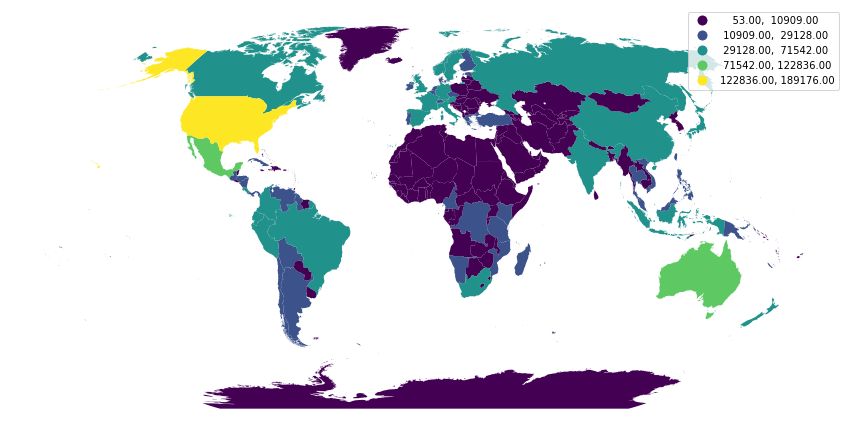

In [7]:
import geopandas
import cartopy

countries = geopandas.read_file(
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
)
gdf = geopandas.GeoDataFrame(
    countries.merge(species_per_country, left_on="ISO_A2", right_index=True)
)
crs = cartopy.crs.Robinson()
ax = gdf.to_crs(crs.proj4_init).plot(
    column="species", legend=True, scheme="natural_breaks", k=5, figsize=(15, 15)
)
ax.set_axis_off()

### Next Steps

Now that you've an introduction to the Forest Inventory and Analysis dataset, learn more with

* The [Reading tabular data quickstart](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-tabular-data/) for an introduction to tabular data on the Planeatry Computer